In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [2]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import preprocessing

from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

# Preprocessing

## Read data

In [4]:
data = pd.read_csv("/content/drive/MyDrive/IS217_OLAP/20522183_20521938_BaoCaoOLAP/DATA/Chennai_Housing_Sale.csv")
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04/05/2011,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19/12/2006,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04/02/2012,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13/03/2010,14,3,2,5,Family,No,...,No Sewer,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05/10/2009,84,1,1,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03/01/2011,51,1,1,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08/04/2004,52,3,2,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25/08/2006,152,2,1,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03/08/2009,40,1,1,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


## X, y

In [5]:
X = data[['AREA', 'INT_SQFT', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL']]
X

,AREA,INT_SQFT,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL
0,Karapakkam,1004,Yes,Commercial,AllPub
1,Anna Nagar,1986,No,Commercial,AllPub
2,Adyar,909,Yes,Commercial,ELO
3,Velachery,1855,No,Others,No Sewer
4,Karapakkam,1226,Yes,Others,AllPub
...,...,...,...,...,...
7104,Karapakkam,598,No,Others,ELO
7105,Velachery,1897,Yes,Others,NoSeWa
7106,Velachery,1614,No,House,NoSeWa
7107,Karapakkam,787,Yes,Commercial,ELO


In [6]:
y = pd.DataFrame(data['SALES_PRICE'])
y

,SALES_PRICE
0,7600000
1,21717770
2,13159200
3,9630290
4,7406250
...,...
7104,5353000
7105,10818480
7106,8351410
7107,8507000


## Preprocessing

### Note


*   Park Facil: 1-Yes, 2-No
*   BUILD TYPE: 0-Commercial, 1-House, 2-Others
*   AREA: 0-Adyar, 1-Anna Nagar, 2-Chromepet, 3-KK Nagar, 4-Karapakkam, 5-T Nagar, 6-Velachery
*   UTILITY AVAIL: 0-AllPub, 1-ELO, 2-No Sewer, 3-NoSeWa





In [7]:
label_encoder = preprocessing.LabelEncoder()

X['AREA']= label_encoder.fit_transform(X['AREA'])
X['BUILDTYPE']= label_encoder.fit_transform(X['BUILDTYPE'])
X['UTILITY_AVAIL']= label_encoder.fit_transform(X['UTILITY_AVAIL'])
X['PARK_FACIL']= label_encoder.fit_transform(X['PARK_FACIL'])

X

<ipython-input-7-2acf5164d120>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AREA']= label_encoder.fit_transform(X['AREA'])
<ipython-input-7-2acf5164d120>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BUILDTYPE']= label_encoder.fit_transform(X['BUILDTYPE'])
<ipython-input-7-2acf5164d120>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,AREA,INT_SQFT,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL
0,4,1004,1,0,0
1,1,1986,0,0,0
2,0,909,1,0,1
3,6,1855,0,2,2
4,4,1226,1,2,0
...,...,...,...,...,...
7104,4,598,0,2,1
7105,6,1897,1,2,3
7106,6,1614,0,1,3
7107,4,787,1,0,1


In [8]:
scaler = MinMaxScaler(feature_range=(0, 15))
y = scaler.fit_transform(y)
y

array([[ 3.79568154],
       [13.64049661],
       [ 7.67230625],
       ...,
       [ 4.31966603],
       [ 4.42816438],
       [ 5.45288421]])

# Train, Test - 7:3

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree

https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

In [10]:
X_train_dt = X_train.copy()
y_train_dt = y_train.copy()

In [11]:
X_test_dt = X_test.copy()
y_test_dt = y_test.copy()

## Train model

In [ ]:
regressor = DecisionTreeRegressor(max_depth=3, random_state = 0)

In [ ]:
regressor.fit(X_train_dt,y_train_dt)

DecisionTreeRegressor(max_depth=3, random_state=0)

### Feature importances

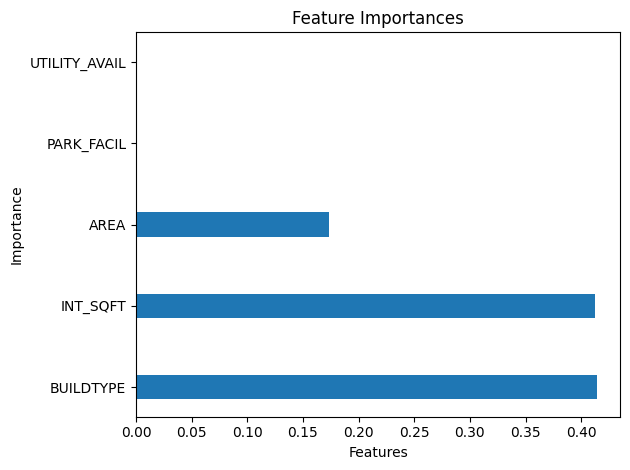

In [ ]:
importances = regressor.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': X_train_dt.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
plt.barh(feature_importances['Feature'], feature_importances['Importance'], height=0.3)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

### Drop low-ranking features

In [12]:
X_train_dt = X_train_dt.drop(columns=['PARK_FACIL','UTILITY_AVAIL'])
X_train_dt

,AREA,INT_SQFT,BUILDTYPE
2673,6,1869,0
257,6,1600,2
306,5,2000,1
4185,5,1707,2
5466,2,967,0
...,...,...,...
2508,0,1217,2
6447,6,1834,0
5495,6,1567,0
3989,3,1366,1


In [13]:
X_test_dt = X_test_dt.drop(columns=['PARK_FACIL','UTILITY_AVAIL'])
X_test_dt

,AREA,INT_SQFT,BUILDTYPE
839,2,1089,2
5295,3,1840,0
4916,1,1716,0
5404,3,1944,0
2141,4,757,0
...,...,...,...
3535,2,1180,1
5722,0,763,2
6020,2,1207,2
5661,3,1721,2


### Tunning model

In [ ]:
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
tun_regr = GridSearchCV(regressor,param_grid=parameters,cv=3,verbose=3)

In [ ]:
tun_regr.fit(X_train_dt,y_train_dt)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
tun_regr.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [14]:
regr_tun = DecisionTreeRegressor(max_depth=5, max_features='auto',max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')
regr_tun.fit(X_train_dt,y_train_dt)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

## Extract rule

In [15]:
text_representation = tree.export_text(regr_tun)
print(text_representation)

|--- feature_1 <= 1508.50
|   |--- feature_2 <= 0.50
|   |   |--- value: [6.30]
|   |--- feature_2 >  0.50
|   |   |--- feature_0 <= 3.50
|   |   |   |--- feature_1 <= 954.00
|   |   |   |   |--- value: [3.94]
|   |   |   |--- feature_1 >  954.00
|   |   |   |   |--- value: [4.96]
|   |   |--- feature_0 >  3.50
|   |   |   |--- value: [2.88]
|--- feature_1 >  1508.50
|   |--- feature_2 <= 0.50
|   |   |--- value: [10.23]
|   |--- feature_2 >  0.50
|   |   |--- feature_0 <= 3.50
|   |   |   |--- value: [7.03]
|   |   |--- feature_0 >  3.50
|   |   |   |--- value: [5.68]



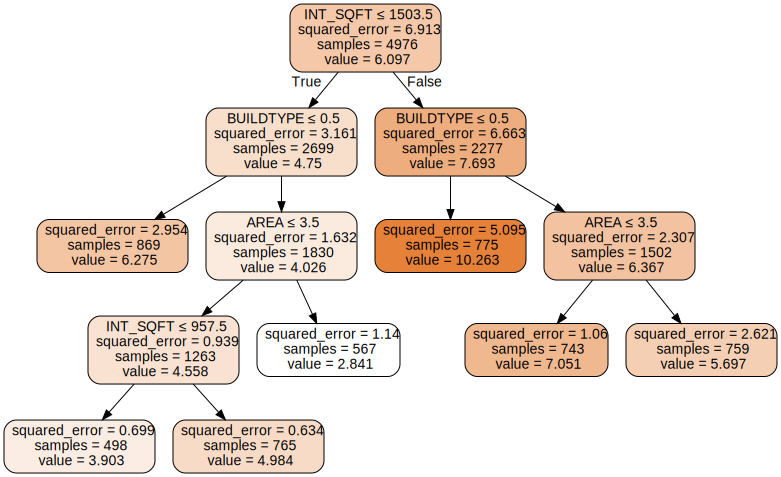

In [ ]:
dot_data = tree.export_graphviz(regr_tun, out_file=None,
                      feature_names=X_train_dt.columns.tolist(),
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(view=True)
graph

In [22]:
scaler.inverse_transform([[6.275,3.903,4.984,2.841,10.263,7.051,5.697]])

array([[11155419.525,  7753897.993,  9304085.504,  6230957.071,
        16874335.153, 12268227.581, 10326549.607]])

## Evaluate

$$ MAE = \frac{1}{n}\sum_{i=1}^{n}\left | y_{i}-\hat{y}_{i} \right | $$

In [ ]:
y_pred_dt = regr_tun.predict(X_test_dt)
mean_absolute_error(y_test_dt, y_pred_dt)

1.1509758039870415

# Random Forest

https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

In [ ]:
X_train_rf = X_train.copy()
y_train_rf = y_train.copy()

In [ ]:
X_test_rf = X_test.copy()
y_test_rf = y_test.copy()

## Train model

In [ ]:
rfr = RandomForestRegressor(max_depth=3, random_state = 0)
rfr.fit(X_train_rf, y_train_rf)

<ipython-input-28-78ad37cb8930>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train_rf, y_train_rf)


RandomForestRegressor(max_depth=3, random_state=0)

### Feature importances

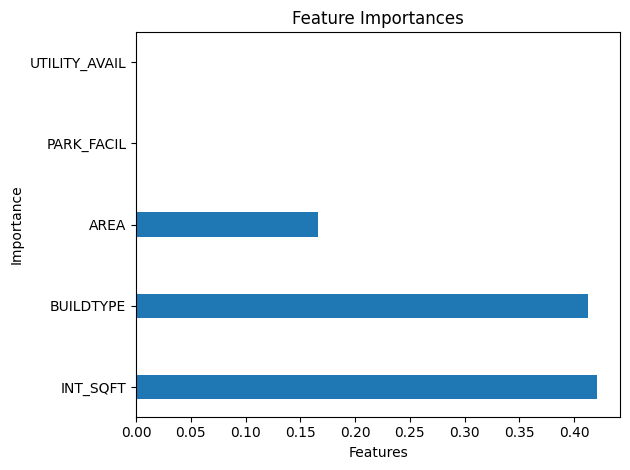

In [ ]:
importances = rfr.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': X_train_rf.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
plt.barh(feature_importances['Feature'], feature_importances['Importance'], height=0.3)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

### Drop low-ranking features

In [ ]:
X_train_rf = X_train_rf.drop(columns=['PARK_FACIL','UTILITY_AVAIL'])
X_train_rf

,AREA,INT_SQFT,BUILDTYPE
6741,6,1742,0
1213,2,1149,0
3781,2,1091,2
6000,2,844,2
6744,4,1654,1
...,...,...,...
6476,0,951,2
81,4,627,1
1135,0,1195,2
6459,2,974,0


In [ ]:
X_test_rf = X_test_rf.drop(columns=['PARK_FACIL','UTILITY_AVAIL'])
X_test_rf

,AREA,INT_SQFT,BUILDTYPE
3618,3,2365,0
5481,5,1920,1
3636,0,692,2
980,3,1927,0
1151,3,2061,1
...,...,...,...
4178,1,1581,0
1797,3,2167,2
6690,1,1823,2
1731,3,2277,2


### Tunning model

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)]

r_grid = {'n_estimators': n_estimators,
            "max_depth" : [1,3,5,7,9,11,12],
           "max_features":["auto", "log2"],
           'bootstrap': [True, False]}

In [ ]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

In [ ]:
rfr_random.fit(X_train_rf,y_train_rf)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=3, random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True, verbose=2)

In [ ]:
rfr_random.best_params_

{'n_estimators': 11, 'max_features': 'auto', 'max_depth': 7, 'bootstrap': True}

In [ ]:
rfr_tun = RandomForestRegressor(n_estimators=11,max_features='auto',max_depth=7,bootstrap=True)
rfr_tun.fit(X_train_rf,y_train_rf)

<ipython-input-36-e44ea4f6f585>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_tun.fit(X_train_rf,y_train_rf)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=7, max_features='auto', n_estimators=11)

## Extract rule

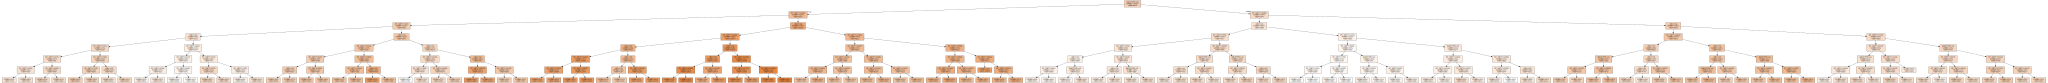

In [ ]:
tree = rfr_tun.estimators_[0]
dot_data = export_graphviz(tree, feature_names=X_train_rf.columns,
                            filled=True, max_depth=7,
                              impurity=False, proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

## Evaluate

$$ MAE = \frac{1}{n}\sum_{i=1}^{n}\left | y_{i}-\hat{y}_{i} \right | $$

In [ ]:
y_pred_rf = rfr_tun.predict(X_test_rf)
mean_absolute_error(y_test_rf, y_pred_rf)

0.6341196892047883